In [1]:
print('22 paskaita')

22 paskaita


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [3]:
from manoFunkcijos import *

In [4]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()

In [5]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
select lytis, count(*),
avg(bdu_spalio)
from DUS2014N
group by lytis;
"""
C.execute(sql)
ans = C.fetchall()
lytis, kiekis, atlyginimas = list(map(list, zip(*ans)))
#? = np.transpose(ans)

In [6]:
pout(ans)

| 0 |       F        |     22366      |2097.37965841008|
| 1 |       M        |     22586      |2633.69374391215|


In [11]:
atlyginimas = list(map(lambda x: x/3.4528, atlyginimas))

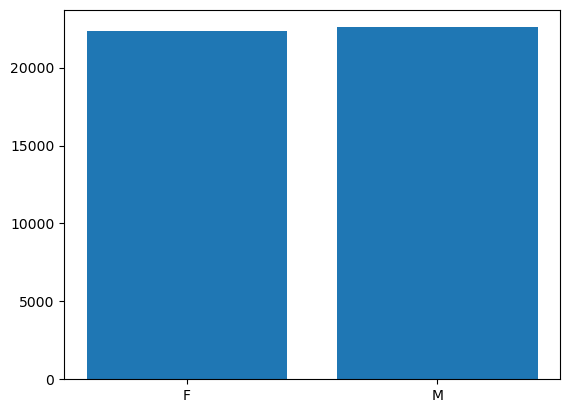

In [12]:
fig, axis = plt.subplots()

axis.bar(lytis, kiekis)

plt.show()

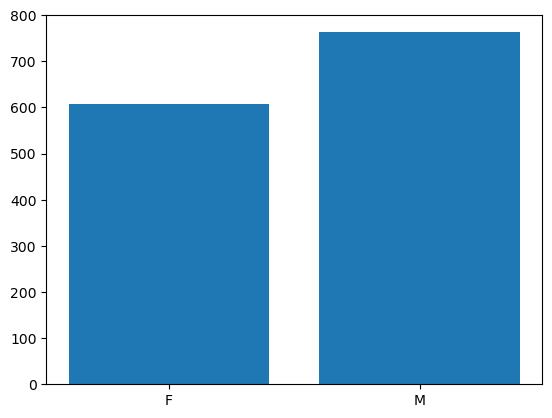

In [13]:
fig, axis = plt.subplots()

axis.bar(lytis, atlyginimas)

plt.show()

In [14]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select *, C/(select count(*) from sa)*100 as '%' from
(select * from
(select device_brand as B, count(*) as C
from sa
where device_brand != ''
group by device_brand
order by C desc
limit 5) as T1
union all
select 'Others', count(*) as C
from sa
where device_brand not in
(select B from (select device_brand as B, count(*) as C
from sa
where device_brand != ''
group by device_brand
order by C desc
limit 5) as T2)) as T3;"""
C.execute(sql)
ans = C.fetchall()
gamintojai, kiekiai, dalis = list(map(list, zip(*ans)))
pout(ans)

Rodoma 5 eilutės iš 6
| 0 |    Samsung     |     36290      |    30.4927     |
| 1 |     Nokia      |     35186      |    29.5651     |
| 2 |   BlackBerry   |      7161      |     6.0170     |
| 3 |       LG       |      5194      |     4.3643     |
| 4 |  SonyEricsson  |      4090      |     3.4366     |


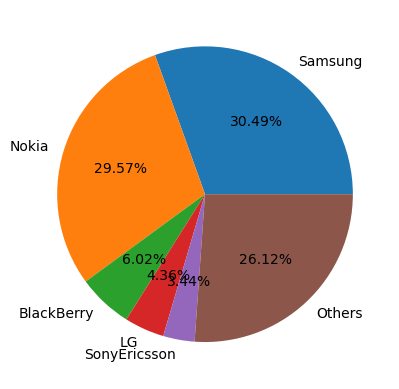

In [18]:
fig, axis = plt.subplots()

axis.pie(kiekiai, labels=gamintojai, autopct='%.2f%%')

plt.show()

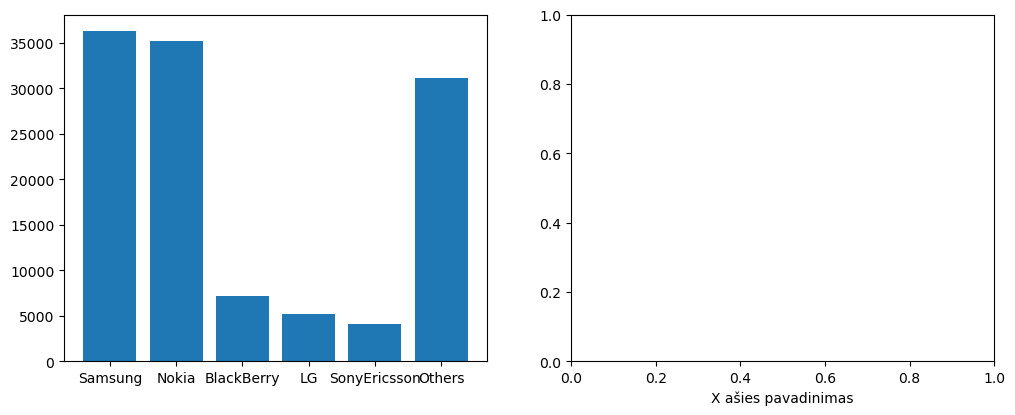

In [24]:
fig, axes = plt.subplots(1,2, figsize=[12,4.5])
axes[0].bar(gamintojai, kiekiai)
axes[1].set_xlabel('X ašies pavadinimas')
plt.show()

In [30]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""with D14 as
(select case
when amzius in ('14-19', '20-29') then '14-29'
else amzius
end as A, count(*)
from DUS2014N
group by A),
D18 as
(select amzius, count(*)
from DUS2018N
group by amzius)
select * from D14 join D18 on D14.A = D18.amzius;"""
C.execute(sql)
ans = C.fetchall()
gr, C14, gr_, C18 = list(map(list, zip(*ans)))
pout(ans)
#? = np.transpose(ans)

| 0 |     14-29      |      9362      |     14-29      |      9368      |
| 1 |     30-39      |      9747      |     30-39      |      9282      |
| 2 |     40-49      |     10947      |     40-49      |      9421      |
| 3 |     50-59      |     10968      |     50-59      |     10056      |
| 4 |      60+       |      3928      |      60+       |      5037      |


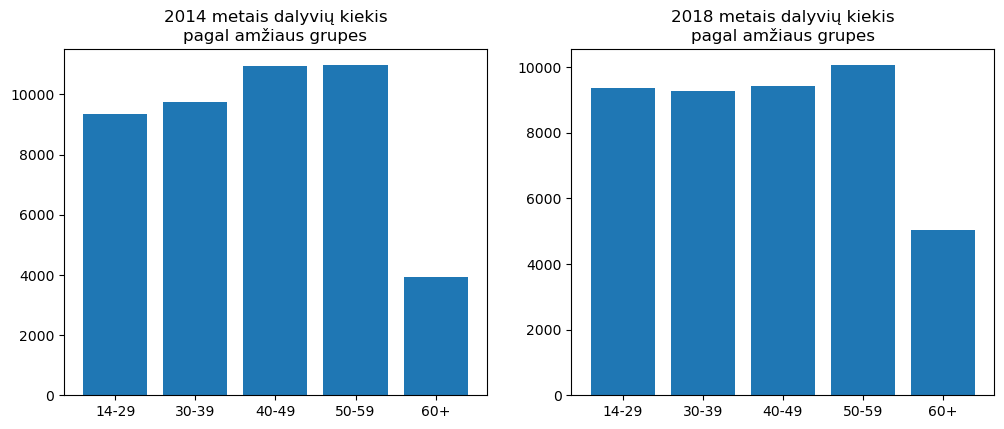

In [34]:
fig, axes = plt.subplots(1,2, figsize=[12,4.5])

axes[0].bar(gr, C14)
axes[1].bar(gr_, C18)
axes[0].set_title('2014 metais dalyvių kiekis\npagal amžiaus grupes')
axes[1].set_title('2018 metais dalyvių kiekis\npagal amžiaus grupes')
plt.show()

In [35]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""with D14f as
(select case
when amzius in ('14-19', '20-29') then '14-29'
else amzius
end as A, count(*)
from DUS2014N
where lytis = 'F'
group by A),
D14m as
(select case
when amzius in ('14-19', '20-29') then '14-29'
else amzius
end as A, count(*)
from DUS2014N
where lytis = 'M'
group by A)
select * from D14f join D14m using (A);"""
C.execute(sql)
ans = C.fetchall()
gr, D14f, D14m = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |     14-29      |      4080      |      5282      |
| 1 |     30-39      |      4551      |      5196      |
| 2 |     40-49      |      5879      |      5068      |
| 3 |     50-59      |      5956      |      5012      |
| 4 |      60+       |      1900      |      2028      |


In [37]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""with D18f as
(select amzius, count(*)
from DUS2018N
where lytis = 'F'
group by amzius),
D18m as
(select amzius, count(*)
from DUS2018N
where lytis = 'M'
group by amzius)
select * from D18f join D18m using (amzius);"""
C.execute(sql)
ans = C.fetchall()
gr, D18f, D18m = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |     14-29      |      4291      |      5077      |
| 1 |     30-39      |      4118      |      5164      |
| 2 |     40-49      |      4670      |      4751      |
| 3 |     50-59      |      5186      |      4870      |
| 4 |      60+       |      2423      |      2614      |


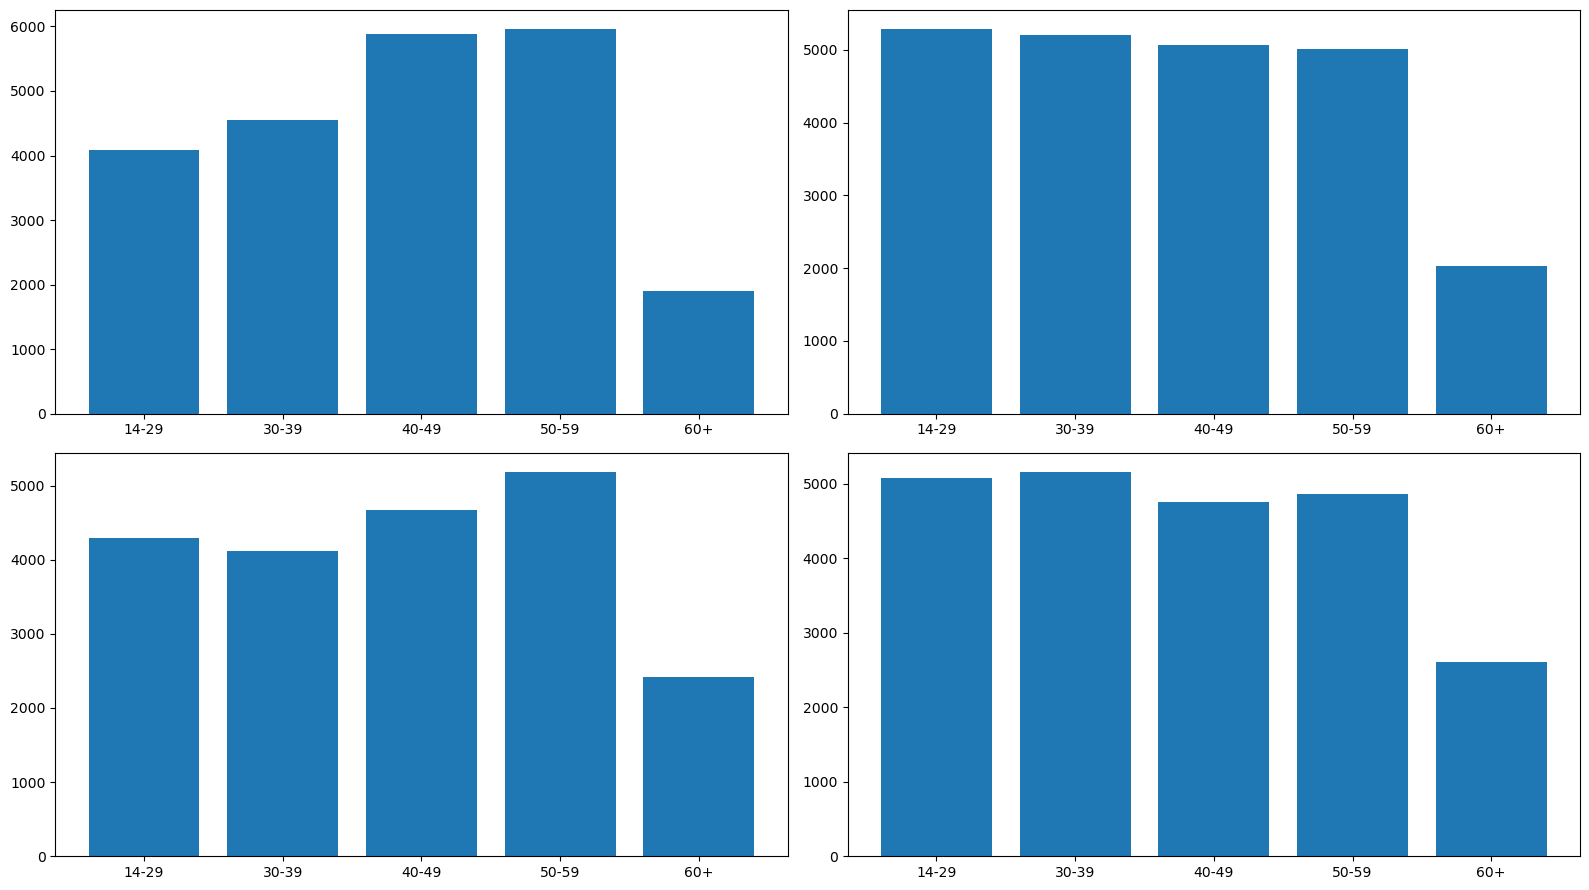

In [38]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(8*2,4.5*2), gridspec_kw={'width_ratios':[1,1], 'height_ratios':[1,1]})
#ax1:
#plotting code:
ax1.bar(gr, D14f)

#ax1.legend(loc='best')
#ax2:
#plotting code:
ax2.bar(gr, D14m)

#ax2.legend(loc='best')
#ax3:
#plotting code:

ax3.bar(gr, D18f)

#ax3.legend(loc='best')
#ax4:
#plotting code:
ax4.bar(gr, D18m)

#ax4.legend(loc='best')
fig.tight_layout()
plt.show()